# Presentation Demonstration

This file contains all of the functions and such required to produce the presentation figures and model output demonstration.

## Import Boilerplate

In [1]:
# MOUNT DRIVE A THE FOLDER DIRECTORY
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# for Cairo
#%cd "drive/MyDrive/APS360 Project /Model"

# for Anastasia
%cd "/content/drive/MyDrive/Project /Model"
%pwd

/content/drive/.shortcut-targets-by-id/1iAsHu75MZqQi03g8IZnF4UG6jJs-pJjE/Project /Model


'/content/drive/.shortcut-targets-by-id/1iAsHu75MZqQi03g8IZnF4UG6jJs-pJjE/Project /Model'

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import DataLoader
import torchvision.models as models

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from IPython import display

from skimage.io import imread
import skimage.io
from sklearn.metrics import classification_report

In [5]:
from utils import ImageDataset

## Model Demonstration

This section will display the sample output from randomly selected images not seen before from any of the models to view their prediction results and intermediate steps.

### Functions

In [6]:
import random

def model_demonstration(model, csv, folder, trans):

    dataset_no_transforms = ImageDataset(
      name='No Transforms',
      csv_file=csv,
      root_dir=folder,
      transforms= transforms.Compose([transforms.ToTensor()])
    )

    dataset_transforms = ImageDataset(
      name='Transforms',
      csv_file=csv,
      root_dir=folder,
      transforms= trans
    )

    train_dataset = ImageDataset(
      name='Train',
      csv_file='training_data_onehot.csv',
      root_dir='Ham10000',
      transforms= None
    )

    no_transform_loader = torch.utils.data.DataLoader(dataset_no_transforms, batch_size=1, shuffle=False)
    no_t = iter(no_transform_loader)

    transform_loader = torch.utils.data.DataLoader(dataset_transforms, batch_size=1, shuffle=False)
    t = iter(transform_loader)

    for j in range(random.randint(0,30)):
      no_t_images, no_t_diagnosis, k = next(no_t)
      t_images, t_diagnosis, k = next(t)

      #############################################
      #To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        no_t_images = no_t_images.cuda()
        t_images = t_images.cuda()
        t_diagnosis = t_diagnosis.cuda()
      #############################################

    '''figure = plt.figure(figsize=(1, 2))
    figure.suptitle('Input Image', y=1.12)
    subplot1 = figure.add_subplot(1, 2, 1, xticks=[], yticks=[])
    plt.subplots_adjust(right = 4)
    plt.imshow(np.transpose(no_t_images[0].detach().cpu().numpy()))
    subplot1.set_title('Original Image') # sets plot title as image label'''


    label = train_dataset.get_categorical_value(t_diagnosis, 'diagnosis')
    '''subplot2 = figure.add_subplot(1, 2, 2, xticks=[], yticks=[])
    plt.imshow(np.transpose(t_images[0].detach().cpu().numpy(), (1, 2, 0)))
    subplot2.set_title('Transformed Image') # sets plot title as image label'''

    # get output from model
    outputs = model(t_images)
    prediction = train_dataset.get_categorical_value(outputs, 'diagnosis')

    return prediction, label
    '''print(f'\nInput Label: {label}')
    print(f'Model Prediction: {prediction}')
    if label == prediction:
        print('\nPrediction is Correct!')
    else:
        print('\nPrediction is Incorrect :(')'''

### CNN Demonstration

In [16]:
## CNN Set Up

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.name = "CNN"
    self.conv1 = nn.Conv2d(3, 25, 3) #in_channels, out_chanels, kernel_size
    self.pool = nn.MaxPool2d(4, 4) #kernel_size, stride
    self.conv2 = nn.Conv2d(25, 40, 3)
    self.pool2 = nn.MaxPool2d(4, 4)
    self.conv3 = nn.Conv2d(40, 14, 3)
    self.pool3 = nn.MaxPool2d(4, 4)
    self.classifier = nn.Sequential(
        nn.Linear(14*6*6, 70),
        nn.ReLU(),
        nn.Linear(70, 7) )

  def forward(self, x):
    #figure = plt.figure(figsize=(6, 1))
    #figure.suptitle('Model Output', y=1.3)

    x1 = self.pool(F.relu(self.conv1(x)))
    #subplot1 = figure.add_subplot(1, 6, 1, xticks=[], yticks=[])
    #plt.imshow(np.transpose(self.conv1(x)[0][0:3].detach().cpu().numpy(), (1, 2, 0)))
    #subplot1.set_title('Conv1')

    '''subplot2 = figure.add_subplot(1, 6, 2, xticks=[], yticks=[])
    plt.imshow(np.transpose(x1[0][0:3].detach().cpu().numpy(), (1, 2, 0)))
    subplot2.set_title('Pool 1')'''

    x2 = self.pool2(F.relu(self.conv2(x1)))
    '''subplot3 = figure.add_subplot(1, 6, 3, xticks=[], yticks=[])
    plt.imshow(np.transpose(self.conv2(x1)[0][0:3].detach().cpu().numpy(), (1, 2, 0)))
    subplot3.set_title('Conv2')

    subplot4 = figure.add_subplot(1, 6, 4, xticks=[], yticks=[])
    plt.imshow(np.transpose(x2[0][0:3].detach().cpu().numpy(), (1, 2, 0)))
    subplot4.set_title('Pool 2')'''

    x3 = self.pool3(F.relu (self.conv3(x2)))
    '''subplot5 = figure.add_subplot(1, 6, 5, xticks=[], yticks=[])
    plt.imshow(np.transpose(self.conv3(x2)[0][0:3].detach().cpu().numpy(), (1, 2, 0)))
    subplot5.set_title('Conv3')

    subplot6 = figure.add_subplot(1, 6, 6, xticks=[], yticks=[])
    plt.imshow(np.transpose(x3[0][0:3].detach().cpu().numpy(), (1, 2, 0)))
    subplot6.set_title('Pool 3')'''

    x = x3.view(x.size(0), -1)
    x = x.view(-1, 14*6*6)
    #x = F.relu(self.fc1(x))
    #x = self.fc2(x)
    x = self.classifier(x)
    return x

In [17]:
cnn_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((450, 450)),
])

In [ ]:
# cnn_model = CNN()
# cnn_model_path = f"Saved Models/CNN Models/model(*){'CNN'}_bs{52}_lr{1e-3}_epoch{20}"
# accuracy = 29

# use_cuda = True
# if use_cuda and torch.cuda.is_available():
#   saved_state = torch.load(cnn_model_path)
#   cnn_model.load_state_dict(saved_state)
#   cnn_model.cuda()
#   print('CUDA is available! Training on GPU ...')
# else:
#   print('CUDA is not available. Training on CPU ...')
#   saved_state = torch.load(cnn_model_path, map_location=torch.device('cpu'))
#   cnn_model.load_state_dict(saved_state)

# for i in range(29):
#   prediction, label = model_demonstration(model=cnn_model, csv='demo_data_onehot.csv', folder='PROVe-AI', trans=cnn_transforms)
#   if label != prediction:
#     accuracy -= 1



In [ ]:
#print(accuracy)

### Autoencoder Demonstration

In [18]:
## Autoencoder Set Up
class AutoEncoderDeepSkip(nn.Module):
    def __init__(self, dropout):
        super(AutoEncoderDeepSkip, self).__init__()
        self.name = 'AutoEncoderDeepSkip'

        self.encoder1 = nn.Conv2d(3,25,5, stride=3, padding=1) # 150 x 150 x 50
        self.encoder2 = nn.Conv2d(25,50,5, stride=3, padding=2) # 50 x 50 x 100
        self.encoder3 = nn.Conv2d(50,75,5, stride=3, padding=1) # 16 x 16 x 150

        self.decoder1 = nn.ConvTranspose2d(75,50,5, stride=3, padding=0) # 50 x 50 X 100
        self.decoder2 = nn.ConvTranspose2d(50,25,5, stride=3, padding=1) # 150 x 150 x 50
        self.decoder3 = nn.ConvTranspose2d(25,3,5, stride=3, padding=1) # 450 x 450 x 3

        self.classifier = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(3*450*450, 500),
            nn.ReLU(),
            nn.Linear(500, 50),
            nn.ReLU(),
            nn.Linear(50, 7)
        )

    def forward(self, x):
        '''figure = plt.figure(figsize=(2, 1))
        figure.suptitle('Model Output', y = 1.3)'''

        encoder1 = F.relu(self.encoder1(x))
        encoder2 = F.relu(self.encoder2(encoder1))
        encoder3 = F.relu(self.encoder3(encoder2))

        '''subplot1 = figure.add_subplot(1, 2, 1, xticks=[], yticks=[])
        plt.subplots_adjust(right = 2)
        plt.imshow(np.transpose(encoder3[0][0:3].detach().cpu().numpy(), (1, 2, 0)))
        subplot1.set_title('Encoder Embedding')'''


        decoder1 = encoder2 + F.relu(self.decoder1(encoder3))
        decoder2 = encoder1 + F.relu(self.decoder2(decoder1))
        decoder3 = F.sigmoid (x + F.relu(self.decoder3(decoder2)))

        '''subplot2 = figure.add_subplot(1, 2, 2, xticks=[], yticks=[])
        plt.imshow(np.transpose(decoder3[0][0:3].detach().cpu().numpy(), (1, 2, 0)))
        subplot2.set_title('Decoder Output')'''

        x = decoder3.view(-1, 3*450*450)
        x = self.classifier(x)
        x.squeeze(1)
        return x

In [ ]:
# autoencoder_model = AutoEncoderDeepSkip(0.05)
# autoencoder_path = f"Saved Models/Autoencoder Models/model_{'AutoEncoderDeepSkip'}_bs{100}_lr{1e-5}_epoch{173}"
# accuracy2 = 29

# use_cuda = True
# if use_cuda and torch.cuda.is_available():
#   saved_state = torch.load(autoencoder_path)
#   autoencoder_model.load_state_dict(saved_state)
#   autoencoder_model.cuda()
#   print('CUDA is available! Training on GPU ...')
# else:
#   print('CUDA is not available. Training on CPU ...')
#   saved_state = torch.load(autoencoder_path, map_location=torch.device('cpu'))
#   autoencoder_model.load_state_dict(saved_state)

# for j in range(1):
#   prediction2, label2 = model_demonstration(model=autoencoder_model, csv='demo_data_onehot.csv', folder='PROVe-AI', trans=cnn_transforms)
#   if label2 != prediction2:
#     accuracy2 -= 1


### MobileNet Demonstration

In [7]:
## MobileNetV2 Set Up
import random

def model_demonstration_mn(model, csv, folder, trans):

    dataset_no_transforms = ImageDataset(
      name='No Transforms',
      csv_file=csv,
      root_dir=folder,
      transforms= transforms.Compose([transforms.ToTensor()])
    )

    dataset_transforms = ImageDataset(
      name='Transforms',
      csv_file=csv,
      root_dir=folder,
      transforms= trans
    )

    no_transform_loader = torch.utils.data.DataLoader(dataset_no_transforms, batch_size=1, shuffle=False)
    no_t = iter(no_transform_loader)

    transform_loader = torch.utils.data.DataLoader(dataset_transforms, batch_size=1, shuffle=False)
    t = iter(transform_loader)

    for j in range(random.randint(0,30)):
      no_t_images, no_t_diagnosis, k = next(no_t)
      t_images, t_diagnosis, k = next(t)

    #############################################
    #To Enable GPU Usage
    if use_cuda and torch.cuda.is_available():
      no_t_images = no_t_images.cuda()
      t_images = t_images.cuda()
      t_diagnosis = t_diagnosis.cuda()
    #############################################

    '''figure = plt.figure(figsize=(1, 2))
    figure.suptitle('Input Image', y=1.12)
    subplot1 = figure.add_subplot(1, 2, 1, xticks=[], yticks=[])
    plt.subplots_adjust(right = 4)
    plt.imshow(np.transpose(no_t_images[0].detach().cpu().numpy()))
    subplot1.set_title('Original Image') # sets plot title as image label'''


    label = dataset_transforms.get_categorical_value(t_diagnosis, 'diagnosis')
    '''subplot2 = figure.add_subplot(1, 2, 2, xticks=[], yticks=[])
    plt.imshow(np.transpose(t_images[0].detach().cpu().numpy(), (1, 2, 0)))
    subplot2.set_title('Transformed Image') # sets plot title as image label'''

    # get output from model
    model_output = model(t_images)

    prediction = dataset_transforms.get_categorical_value(model_output, 'diagnosis')
    '''print(f'\nInput Label: {label}')
    print(f'Model Prediction: {prediction}')
    if label == prediction:
        print('\nPrediction is Correct!')
    else:
        print('\nPrediction is Incorrect :(')'''

In [8]:
mobile_net_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
# mn_model = models.mobilenet_v2(weights=True)

# mn_model.name = 'MobileNetV2Extraction'

# mn_model.classifier = nn.Sequential(
#     nn.Dropout(0.2),
#     nn.Linear(1280, 500),
#     nn.ReLU(),
#     nn.Linear(500, 50),
#     nn.ReLU(),
#     nn.Linear(50, 7)
# )

# mn_path = f"Saved Models/Pretrained Models/model_{'MobileNetV2Extraction'}_bs{100}_lr{1e-5}_epoch{92}"

# use_cuda = True
# if use_cuda and torch.cuda.is_available():
#   saved_state = torch.load(mn_path)
#   mn_model.load_state_dict(saved_state)
#   mn_model.cuda()
#   print('CUDA is available! Training on GPU ...')
# else:
#   print('CUDA is not available. Training on CPU ...')
#   saved_state = torch.load(mn_path, map_location=torch.device('cpu'))
#   mn_model.load_state_dict(saved_state)

#model_demonstration_mn(model=mn_model, csv='demo_data_onehot.csv', folder='PROVe-AI', trans=mobile_net_transforms)

## Model Test on Unseen Data

In [9]:
cnn_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((450, 450)),
])


mobile_net_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

cnn_dataset = ImageDataset(
   name='Demo',
   csv_file='demo_data_onehot.csv',
   root_dir='PROVe-AI',
   transforms= cnn_transforms
)

mn_dataset = ImageDataset(
   name='Demo',
   csv_file='demo_data_onehot.csv',
   root_dir='PROVe-AI',
   transforms= mobile_net_transforms
)

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def test_model(model, test_dataset, batch_size):
    print('Fetching Loader')
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

    # for accuracy calc
    correct_predictions = 0
    num_images = 0

    # for confustion matrix
    predictions = []
    labels = []

    batch_num = 0
    for i, data in enumerate(test_loader, 0):
        batch_num += 1
        print(f'Batch Number: {batch_num}')
        images, diagnosis, ben_or_mal = data

        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          images = images.cuda()
          diagnosis = diagnosis.cuda()
          ben_or_mal = ben_or_mal.cuda()
        #############################################

        num_images += len(images)

        # get output from model
        outputs = model(images)


        # Model Prediction
        prediction = outputs.max(1, keepdim=True)[1]
        predictions.extend(prediction.cpu().numpy())

        # Ground Truth Label
        label = diagnosis.max(1, keepdim=True)[1]
        labels.extend(label.cpu().numpy())

        correct_predictions += prediction.eq(label.view_as(prediction)).sum().item()

    acc = correct_predictions/num_images # calculate overall accuracy
    print(f"\nOverall Accuracy: {acc*100}%")

    return acc, predictions, labels

def plot_cm(labels, predictions, test_dataset):
    train_dataset = ImageDataset(
      name='Train',
      csv_file='training_data_onehot.csv',
      root_dir='Ham10000',
      transforms= None
    )
    cm = confusion_matrix(labels, predictions)
    cm_matrix = pd.DataFrame(data=cm,
        columns=[f'Predicted {diag}' for diag in train_dataset.column_values['diagnosis']],
        index=[f'Actual {diag}' for diag in train_dataset.column_values['diagnosis']]
    )

    m = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
    m.set_xticklabels(m.get_xticklabels(), rotation = 35, horizontalalignment='right')
    return m, cm_matrix

CUDA is available!  Training on GPU ...
Fetching Loader


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Batch Number: 1
Batch Number: 2
Batch Number: 3
Batch Number: 4
Batch Number: 5
Batch Number: 6
Batch Number: 7
Batch Number: 8
Batch Number: 9
Batch Number: 10
Batch Number: 11
Batch Number: 12
Batch Number: 13
Batch Number: 14
Batch Number: 15
Batch Number: 16
Batch Number: 17
Batch Number: 18
Batch Number: 19
Batch Number: 20
Batch Number: 21
Batch Number: 22
Batch Number: 23

Overall Accuracy: 32.01692524682652%
Test Accuracy of Saved Models/CNN Models/model(*)CNN_bs52_lr0.001_epoch20: 32.01692524682652


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.35      0.57      0.43       119
           1       0.03      0.56      0.06         9
           2       0.34      0.32      0.33       111
           3       0.38      0.42      0.40        95
           4       0.79      0.30      0.44       262
           5       0.00      0.00      0.00       113
           6       0.00      0.00      0.00         0

    accuracy                           0.32       709
   macro avg       0.27      0.31      0.24       709
weighted avg       0.45      0.32      0.34       709



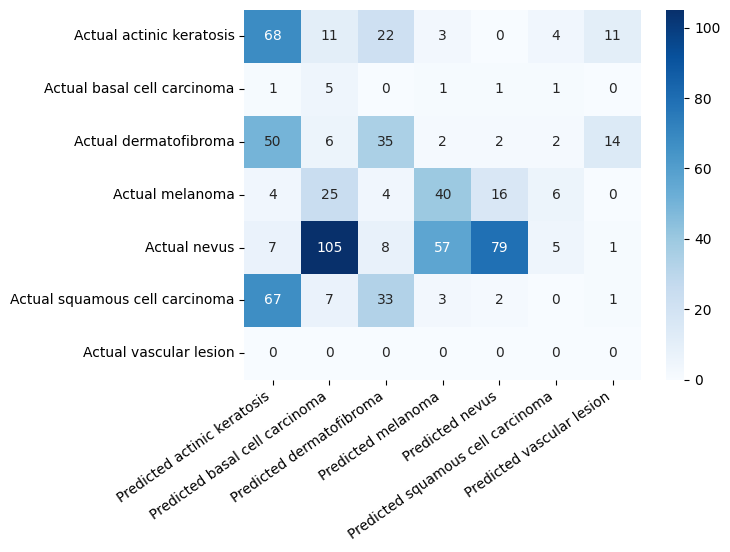

In [23]:
good_model = CNN()
good_model_path = f"Saved Models/CNN Models/model(*){'CNN'}_bs{52}_lr{1e-3}_epoch{20}"

use_cuda = True

if use_cuda and torch.cuda.is_available():
  saved_state = torch.load(good_model_path)
  good_model.load_state_dict(saved_state)
  good_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  saved_state = torch.load(good_model_path, map_location=torch.device('cpu'))
  good_model.load_state_dict(saved_state)

test_acc, prediction, labels = test_model(good_model, cnn_dataset, batch_size=32)

print(f'Test Accuracy of {good_model_path}: {test_acc*100}')
heat_map, cm_matrix = plot_cm(labels, prediction, cnn_dataset)

print(classification_report(labels, prediction))

CUDA is available!  Training on GPU ...
Fetching Loader


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Batch Number: 1
Batch Number: 2
Batch Number: 3
Batch Number: 4
Batch Number: 5
Batch Number: 6
Batch Number: 7
Batch Number: 8
Batch Number: 9
Batch Number: 10
Batch Number: 11
Batch Number: 12
Batch Number: 13
Batch Number: 14
Batch Number: 15
Batch Number: 16
Batch Number: 17
Batch Number: 18
Batch Number: 19
Batch Number: 20
Batch Number: 21
Batch Number: 22
Batch Number: 23

Overall Accuracy: 15.937940761636108%
Test Accuracy of Saved Models/Autoencoder Models/model_AutoEncoderDeepSkip_bs100_lr1e-05_epoch173: 15.937940761636108
              precision    recall  f1-score   support

           0       0.32      0.73      0.45       119
           1       0.01      0.22      0.02         9
           2       0.32      0.14      0.19       111
           3       0.57      0.04      0.08        95
           4       0.33      0.02      0.03       262
           5       0.12      0.01      0.02       113
           6       0.00      0.00      0.00         0

    accuracy               

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


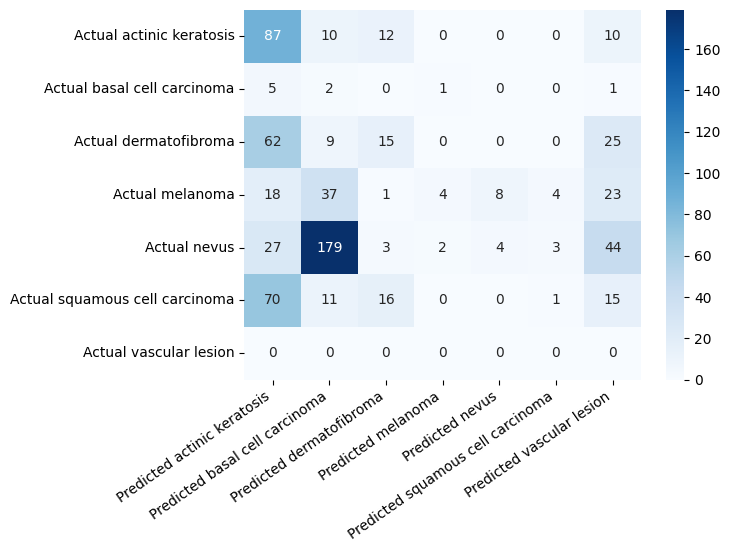

In [24]:
good_model = AutoEncoderDeepSkip(0.05)
good_model_path = f"Saved Models/Autoencoder Models/model_{'AutoEncoderDeepSkip'}_bs{100}_lr{1e-5}_epoch{173}"

use_cuda = True

if use_cuda and torch.cuda.is_available():
  saved_state = torch.load(good_model_path)
  good_model.load_state_dict(saved_state)
  good_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  saved_state = torch.load(good_model_path, map_location=torch.device('cpu'))
  good_model.load_state_dict(saved_state)

test_acc, prediction, labels = test_model(good_model, cnn_dataset, batch_size=32)

print(f'Test Accuracy of {good_model_path}: {test_acc*100}')
heat_map, cm_matrix = plot_cm(labels, prediction, cnn_dataset)

print(classification_report(labels, prediction))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 68.4MB/s]


CUDA is not available.  Training on CPU ...
Fetching Loader


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Batch Number: 1
Batch Number: 2
Batch Number: 3
Batch Number: 4
Batch Number: 5
Batch Number: 6
Batch Number: 7
Batch Number: 8
Batch Number: 9
Batch Number: 10
Batch Number: 11
Batch Number: 12
Batch Number: 13
Batch Number: 14
Batch Number: 15
Batch Number: 16
Batch Number: 17
Batch Number: 18
Batch Number: 19
Batch Number: 20
Batch Number: 21
Batch Number: 22
Batch Number: 23
Batch Number: 24
Batch Number: 25
Batch Number: 26
Batch Number: 27
Batch Number: 28
Batch Number: 29
Batch Number: 30
Batch Number: 31
Batch Number: 32
Batch Number: 33
Batch Number: 34
Batch Number: 35
Batch Number: 36
Batch Number: 37
Batch Number: 38
Batch Number: 39
Batch Number: 40
Batch Number: 41
Batch Number: 42
Batch Number: 43
Batch Number: 44
Batch Number: 45

Overall Accuracy: 26.79830747531735%
Test Accuracy of Saved Models/Pretrained Models/model_MobileNetV2Extraction_bs100_lr1e-05_epoch92: 26.79830747531735


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.32      0.18      0.23       119
           1       0.02      0.22      0.03         9
           2       0.28      0.37      0.32       111
           3       0.25      0.28      0.27        95
           4       0.61      0.29      0.39       262
           5       0.25      0.20      0.22       113
           6       0.00      0.00      0.00         0

    accuracy                           0.27       709
   macro avg       0.25      0.22      0.21       709
weighted avg       0.40      0.27      0.31       709



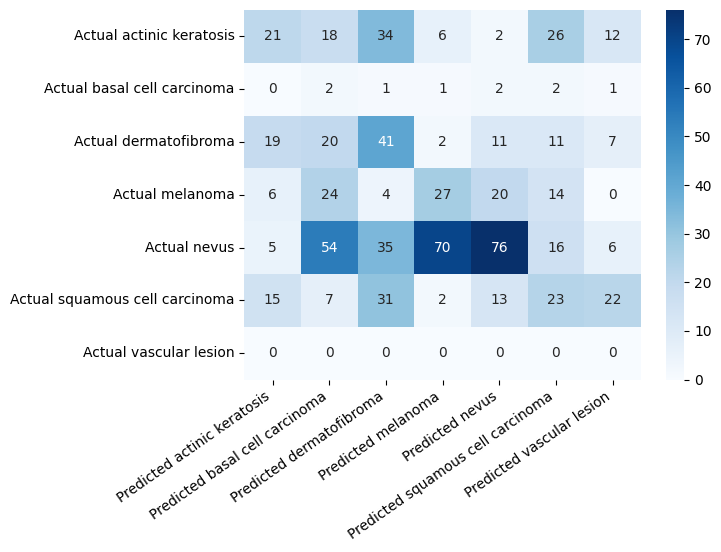

In [11]:
good_model = models.mobilenet_v2(weights=True)

good_model.name = 'MobileNetV2Extraction'

good_model.classifier = nn.Sequential(
    nn.Dropout(0.2),
    nn.Linear(1280, 500),
    nn.ReLU(),
    nn.Linear(500, 50),
    nn.ReLU(),
    nn.Linear(50, 7)
)

good_model_path = f"Saved Models/Pretrained Models/model_{'MobileNetV2Extraction'}_bs{100}_lr{1e-5}_epoch{92}"

use_cuda = True

if use_cuda and torch.cuda.is_available():
  saved_state = torch.load(good_model_path)
  good_model.load_state_dict(saved_state)
  good_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  saved_state = torch.load(good_model_path, map_location=torch.device('cpu'))
  good_model.load_state_dict(saved_state)

test_acc, prediction, labels = test_model(good_model, cnn_dataset, batch_size=16)

print(f'Test Accuracy of {good_model_path}: {test_acc*100}')
heat_map, cm_matrix = plot_cm(labels, prediction, mn_dataset)

print(classification_report(labels, prediction))